## Introdução

Este projeto analisa dados do aplicativo de namoro online OKCupid. Nos últimos anos, houve um aumento maciço no uso de aplicativos de namoro para encontrar a pessoa certa. Muitos desses aplicativos usam técnicas sofisticadas de ciência de dados para recomendar possíveis correspondências aos usuários e otimizar a experiência do usuário. Esses aplicativos nos dão acesso a uma riqueza de informações que nunca tivemos antes sobre como diferentes pessoas vivenciam o romance.

O objetivo deste projeto é definir o escopo, preparar, analisar e criar um modelo de aprendizado de máquina para resolver uma questão.

Fontes de dados:

profiles.csv foi fornecido por Codecademy.com.

## Escopo

É benéfico criar um escopo de projeto sempre que um novo projeto está sendo iniciado. Abaixo estão quatro seções para ajudar a orientar o processo e o progresso do projeto. A primeira seção são os objetivos do projeto, uma seção para definir os objetivos de alto nível e definir as intenções para este projeto. A próxima seção são os dados, felizmente neste projeto, os dados já foram fornecidos, mas ainda precisam ser verificados se os objetivos do projeto podem ser alcançados com os dados disponíveis. Em terceiro lugar, a análise terá que ser pensada, incluindo os métodos e o alinhamento das questões com os objetivos do projeto. Por fim, a avaliação ajudará a construir conclusões e descobertas a partir da análise

## Objetivos do Projeto
Neste projeto, o objetivo é utilizar as habilidades aprendidas por meio do Codecademy e aplicar técnicas de aprendizado de máquina a um conjunto de dados. A principal questão de pesquisa que será respondida é se o signo astrológico de um usuário do OkCupid pode ser previsto usando outras variáveis de seus perfis. Este projeto é importante, pois muitos usuários consideram os signos astrológicos uma parte importante das correspondências e, se os usuários não inserirem seu signo, o OkCupid gostaria de prever qual signo eles podem ser. A segunda questão é descobrir se existe alguma relação entre a orientação sexual da pessoa e a religião, tendo em vista que a ideologia veiculada pelas religiões, como as católicas, as evangélicas, protestantes, islâmicas, conserva um conflito não resolvido com a questão da sexualidade.

## Análise
Esta solução usará estatísticas descritivas e visualização de dados para encontrar figuras-chave na compreensão da distribuição, contagem e relacionamento entre variáveis. Visto que o objetivo do projeto é fazer previsões sobre os signos astrológicos do usuário e relação etnia/drogas, serão implementados algoritmos de classificação da família de aprendizado supervisionado de modelos de aprendizado de máquina.


## Avaliação
O projeto será concluído com a avaliação do modelo de aprendizado de máquina selecionado com um conjunto de dados de validação. A saída das previsões pode ser verificada por meio de uma matriz de confusão e métricas como exatidão, precisão, recall, pontuações F1 e Kappa.

## Importando Módulos Python

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]

import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados
Para analisar os perfis de usuário do OkCupid, a biblioteca Pandas será usada para carregar o conjunto de dados em um DataFrame para que possa ser explorado e visualizado com Python.

Aqui o profiles.csv é carregado em um DataFrame chamado profiles. O DataFrame é examinado brevemente usando .head() para verificar o conteúdo.

In [2]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [4]:
df.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

## Caracteristicas dos Dados

Foi possível perceber que o nosso banco de dados possuem 31 colunas e 59.946 linhas, que é um bom sinal já que teremos dados o suficiente para os nossos modelos de machine learning. Também foi possivel perceber que os dados que me foram fornecidos são dados entre os anos de 2012 e 2013

As colunas do banco de dados será listada à baixo:
    
- **age:** variável contínua da idade dos usuários
- **body_type:** variável categórica do tipo de corpo do usuário
- **diet:** variável categórica com informações sobre a dieta do usuário
- **drinks:** variável categórica sobre o consumo de alcool
- **drugs:** variável categórica sobre o uso de drogas
- **education:** variável categórica sobre o grau de escolaridade do usuário
- **ethnicity:** variável categórica sobre a etnia do usuário
- **height:** variável continua sobre a altura do usuário
- **income:** variável continua sobre a renda do usuário
- **job:** variável categórica sobre a descrição do emprego do usuário
- **offspring:** variável categórica sobre o usuário possuir filhos ou não
- **orientation:** variável categórica sobre a orientação sexual do usuário
- **pets:** variável categórica sobre a preferência de animais de estimação
- **religion:** variável categórica sobre a religião do usuário
- **sex:** variável categórica sobre o gênero do usuário
- **sign:** variável categórica sobre o signo astrológico do usuário
- **smokes:** variável categórica sobre o usuário ser fumante ou não
- **speaks:** variável categórica sobre os idiomas falados pelo usuário
- **status:** variável categórica sobre status de relacionamento do usuário
- **last_online:** variável de data sobre a ultimo vez em que o usuário esteve online
- **location:** variável categorica sobre a localização do usuário

E também teremos as perguntas de respostas curtas:

- **essay0:** meu auto resumo
- **essay1:** O que estou fazendo da minha vida
- **essay2:** sou muito bom em
- **essay3:** A primeira coisa que as pessoas costumam notar em mim
- **essay4:** livros, filmes, programas, músicas e comidas favoritos
- **essay5:** As seis coisas que eu nunca poderia prescindir
- **essay6:** Passo muito tempo pensando sobre
- **essay7:** Em uma noite típica de sexta-feira, estou
- **essay8:** A coisa mais particular que estou disposto a admitir
- **essay9:** Você deveria me enviar uma mensagem se...

#### Todos os dados estão em inglês, porém eu os traduzi durante a apresentação deles para ficar de melhor entendimento

In [5]:
list(df.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [6]:
df.height.describe()

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

## Exploração dos Dados

In [7]:
print(f'Quantidade de categorias: {df.sign.nunique()}' )
print(f'Categorias: {df.sign.unique()}')

Quantidade de categorias: 48
Categorias: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'sc

## Limpeza dos Dados
É importante nós fazermos a limpeza das categorias nessa parte, tendo em vista que temos 48 categorias diferentes, eu irei fazer isso pegando a primeira palavra de todas as respostas e, então, terei apenas os signos dos usuários

In [8]:
df['signsCleaned'] = df.sign.str.split().str.get(0)
print(f'Quantidade de categorias: {df.signsCleaned.nunique()}')
print(f'Categorias: {df.signsCleaned.unique()}') 

df.signsCleaned.value_counts()

Quantidade de categorias: 12
Categorias: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

## Variáveis Continuas

#### Idade
O próximo gráfica irá mostrar a distribuição da idade dos usuários, será possível perceber que a maior parte dos usuário está concentrada entre os 20 e 40 anos.

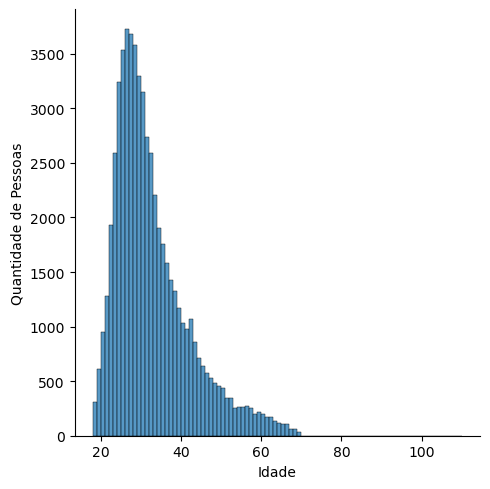

<Figure size 600x600 with 0 Axes>

In [9]:
sns.displot(data = df, x = df['age'], kind = 'hist', binwidth = 1)
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()
plt.clf()

Agora irei mostrar o mesmo gráfico, porém dividido entre os gêneros, para podermos ter uma ideia da proporção de homens e mulheres

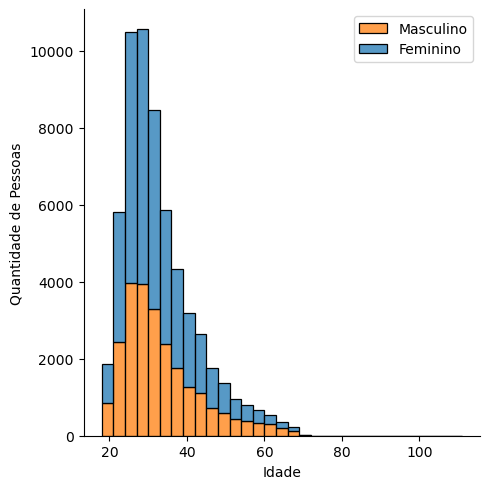

In [10]:
sns.displot(data=df, x="age", hue="sex", kind="hist", binwidth = 3, multiple = "stack", legend = False)
plt.legend(['Masculino', 'Feminino'])
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Altura

Agora irei mostrar o gráfico com as informações das alturas do usuário, no gráfico está sendo representada por polegadas, porém, fazendo a conversão iremos perceber que a maior parte dos usuários tem entre 1,65 metros e 1,82 metros.

<Figure size 600x600 with 0 Axes>

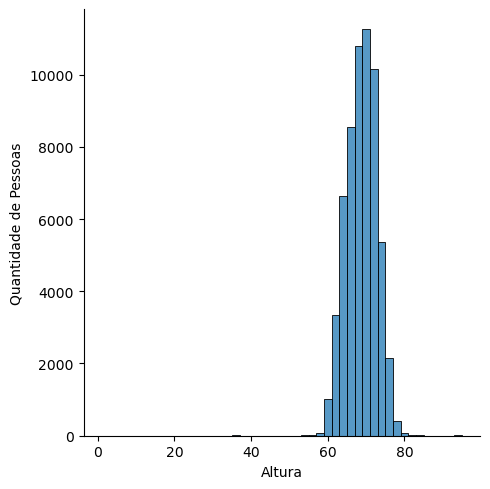

In [11]:
sns.displot(data=df, x="height", kind="hist", binwidth = 2)
plt.xlabel('Altura')
plt.ylabel('Quantidade de Pessoas')
plt.show()
plt.clf()

Agora irei mostrar o mesmo gráfico porém fazendo a divisão entre homens e mulheres.

<Figure size 600x600 with 0 Axes>

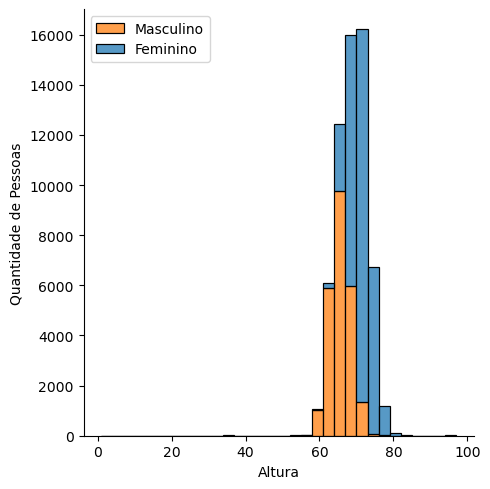

In [12]:
sns.displot(data=df, x= 'height', hue= 'sex', kind = 'hist', binwidth = 3, multiple = 'stack', legend = False)
plt.legend(['Masculino', 'Feminino'])
plt.xlabel('Altura')
plt.ylabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Renda
Agora irei mostrar o gráfico da renda dos usuários (dólares por ano), foi possível perceber que grande parte das pessoas não preencheram essa coluna, também foi possível perceber que a média salárial das mulheres é metade da média dos homens.

<Figure size 600x600 with 0 Axes>

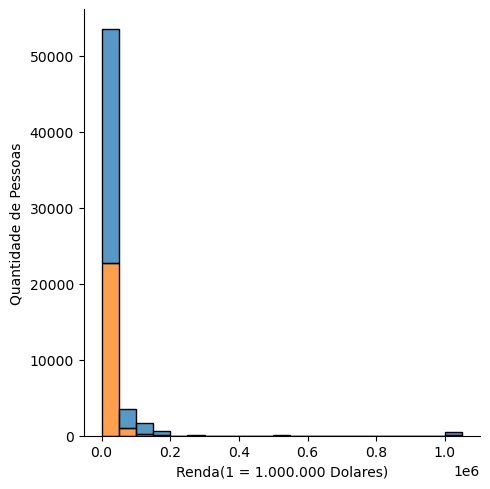

In [13]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack", legend = False)
plt.xlabel('Renda(1 = 1.000.000 Dolares)')
plt.ylabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Variáveis discretas

#### Genero
Anteriormente foi possível perceber que há mais homens do que mulheres cadastradas no aplicativo, na próxima célula irei mostrar essa diferença; Nela, conseguimos perceber que existem, em média, 35.000 homens e 25.000 mulheres

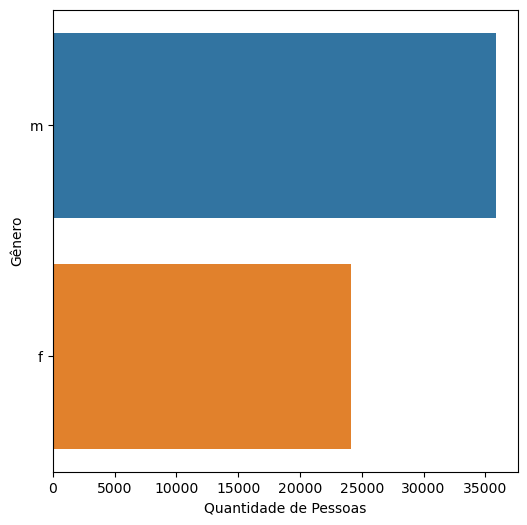

In [14]:
sns.countplot(data=df, y = 'sex', orient = 'v')
plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Gênero')
plt.show()
plt.clf()

#### Tipo do corpo
No próximo gráfico iremos analisar as variáveis dos tipos de corpo, será possível perceber que a maioria dos usuários se descrevem como tendo um corpo 'médio', atletico ou está em forma.

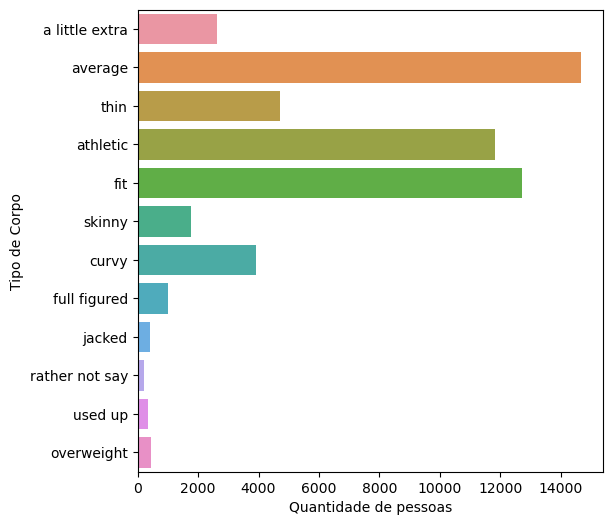

In [15]:
sns.countplot(data = df, y = 'body_type')
plt.xlabel('Quantidade de pessoas')
plt.ylabel('Tipo de Corpo')
plt.show()
plt.clf()

O próximo gráfico irá dividir os dados pelo gênero, e poderemos perceber que algumas dessas caracteristicas são muito ligadas ao gênero da pessoas. Por exemplo, "curvy" (Curvilínea) e "full figured" (Corpo não magro porém bem definido) estão muito associados ao corpo feminino, enquanto no sexo masculino é possivel perceber que existem mais homens que se descrevem como 'a little extra' (Um pouco acima da média) ou 'overweight' (Acima do peso).

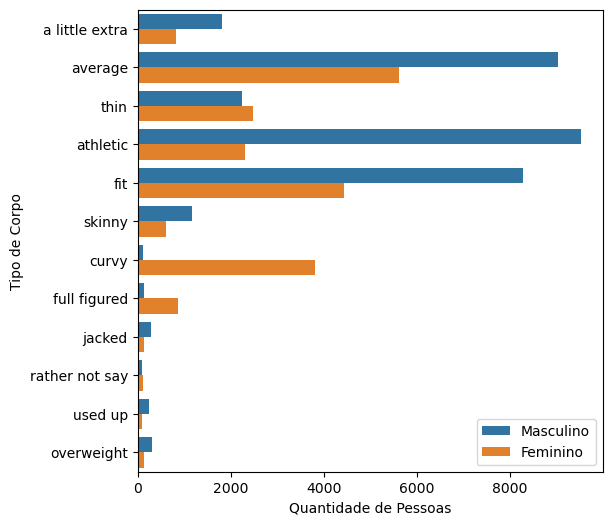

In [16]:
sns.countplot(data=df, y = 'body_type', hue = 'sex')
plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Tipo de Corpo')
plt.legend(['Masculino', 'Feminino'])
plt.show()
plt.clf()

## Dieta

Agora, mostrarei o gráfico sobre a informação da dieta dos usuários, a maioria dos usuários comem quase qualquer coisa, seguido por pessoas que comem de tudo.

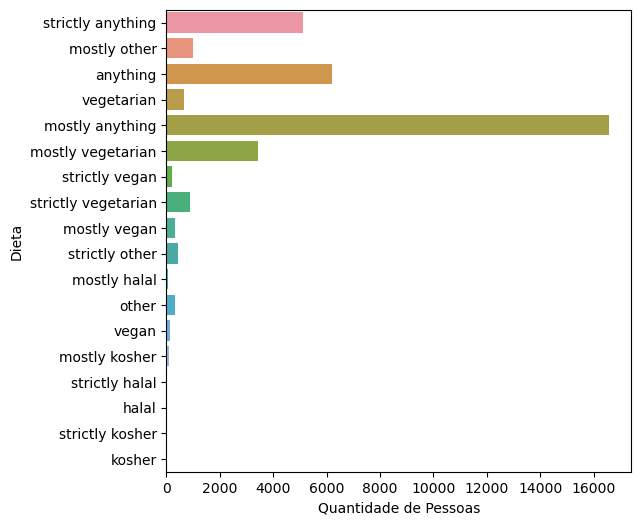

In [17]:
sns.countplot(data=df, y="diet")
plt.ylabel('Dieta')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Bebidas

No próximo gráfico iremos perceber que a maioria dos usuários bebem socialmente, seguido por raramente e depois com uma certa frequência.

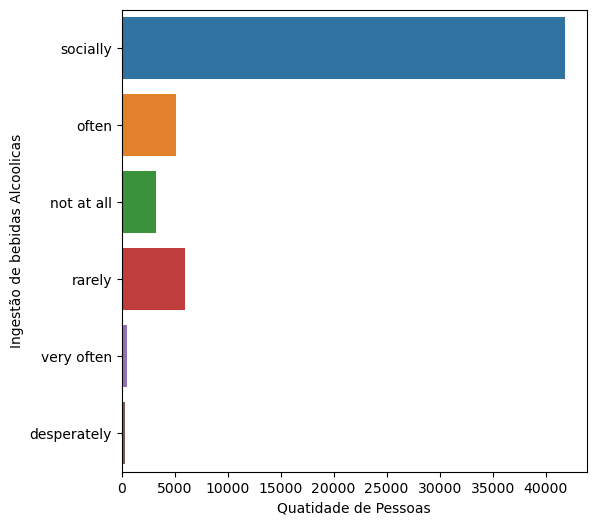

<function matplotlib.pyplot.clf()>

In [18]:
sns.countplot(data=df, y="drinks")
plt.ylabel('Ingestão de bebidas Alcoolicas')
plt.xlabel('Quatidade de Pessoas')
plt.show()
plt.clf

## Educação

A baixo, iremos perceber que a maioria dos usuarios são graduados na faculdade, seguido por pessoas com mestrado.

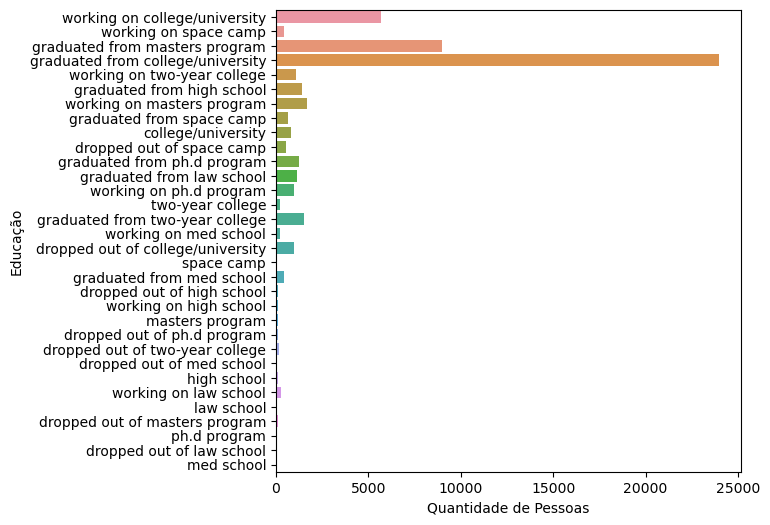

In [19]:
sns.countplot(data = df, y="education")
plt.ylabel('Educação')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Trabalho

A maioria dos usuários não se encaixaram nas categorias que foram disponibilizadas, porém pode se perceber que temos uma quantidade grande de estudantes, artistas, profissionais da área de tecnologia e empresários.

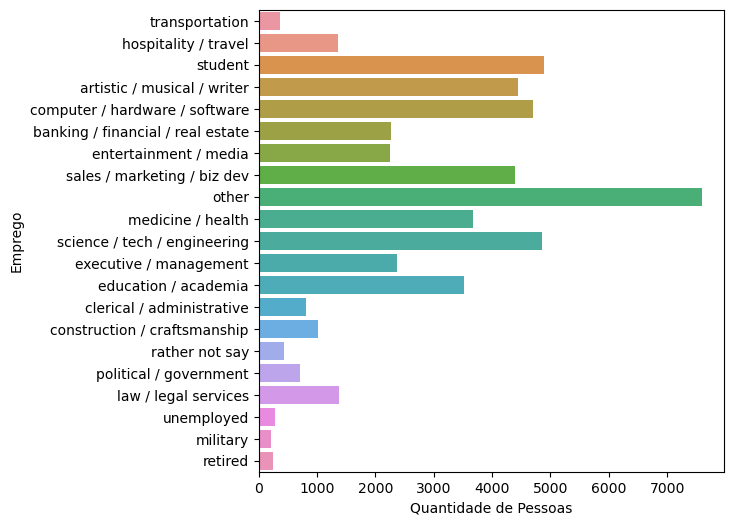

In [20]:
sns.countplot(data=df, y='job')
plt.ylabel('Emprego')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Filhos

Os dados mostram que a maioria dos usuários não possuem filhos.

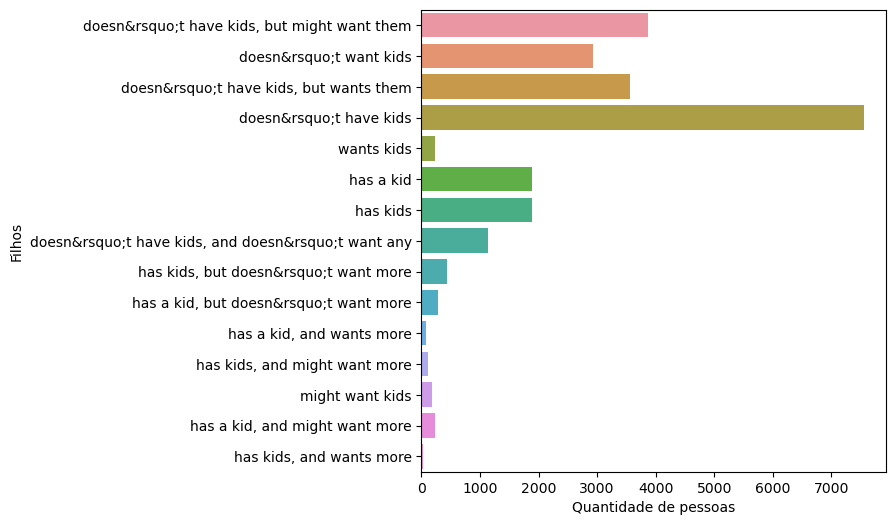

In [21]:
sns.countplot(data = df, y = 'offspring')
plt.ylabel('Filhos')
plt.xlabel('Quantidade de pessoas')
plt.show()
plt.clf()

## Orientação Sexual

A maioria dos usuários são heterossexuais.

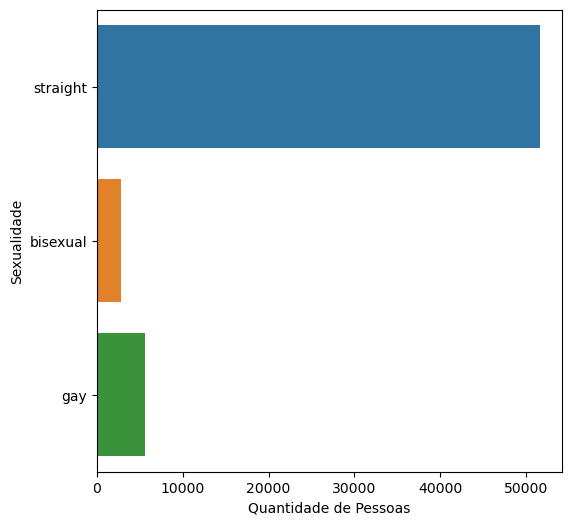

In [22]:
sns.countplot(data = df, y='orientation')
plt.ylabel('Sexualidade')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

No proximo gráfico poderemos perceber que a grande maioria dos usuários bisexuais são do gênero feminino.

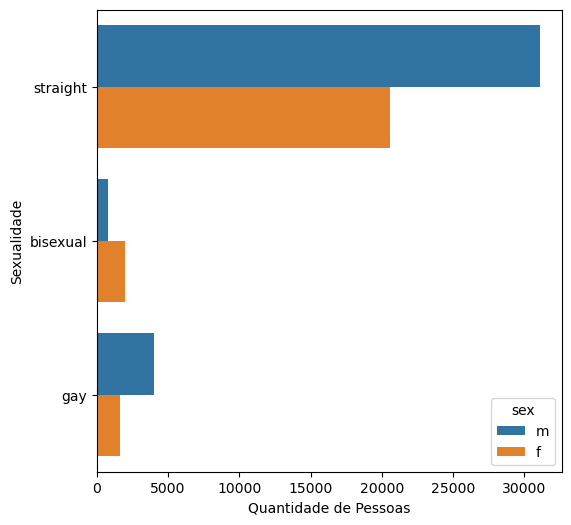

In [23]:
sns.countplot(data=df, y = 'orientation', hue = 'sex')
plt.ylabel('Sexualidade')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Religião

Os dados sobre a religião são simililares aos dados sobre os signos dos usuários. Nós temos muitos qualificadores.

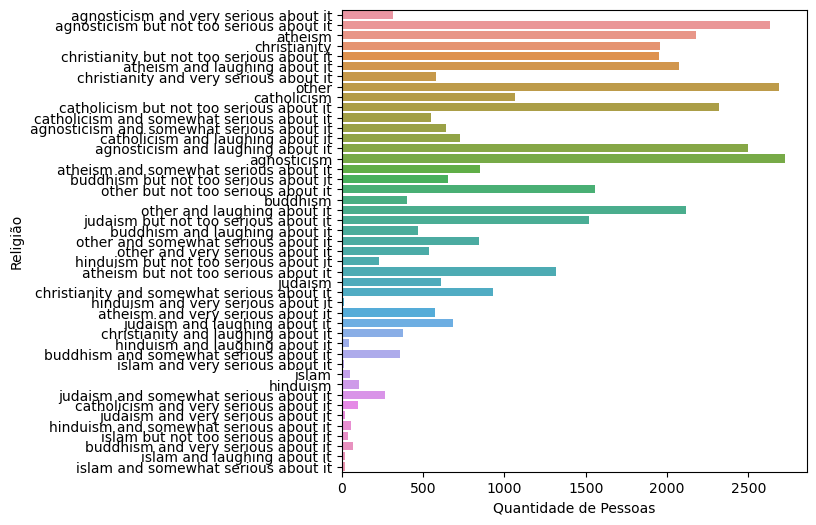

In [24]:
sns.countplot(data=df, y='religion')
plt.ylabel('Religião')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

Irei limpar os dados sobre a religião do usuários, pegando apenas a primeira palavra e eles serão compostos por apenas 9 grupos. A maioria dos usuários não são muito religiosos, tendo em vista que muitos se identificam como agnósticos, outra religião ou ateístas.

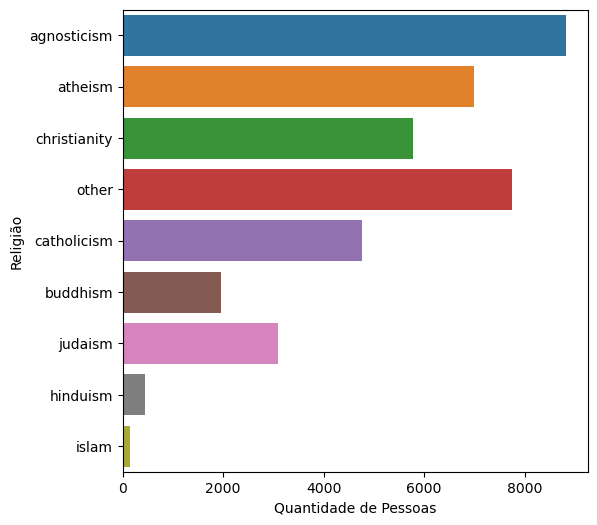

In [25]:
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data = df, y = 'religionCleaned')
plt.ylabel('Religião')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Signos

Aqui estão os signos astrológicos dos usuários. Podemos perceber que os signos estão bem distribuidos.

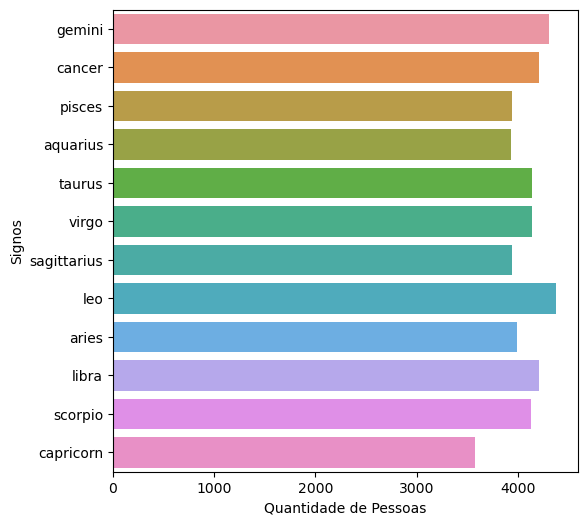

In [26]:
sns.countplot(data=df, y = 'signsCleaned')
plt.ylabel('Signos')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Fumante

Similar às drogas, a maioria dos usuários não fumam.

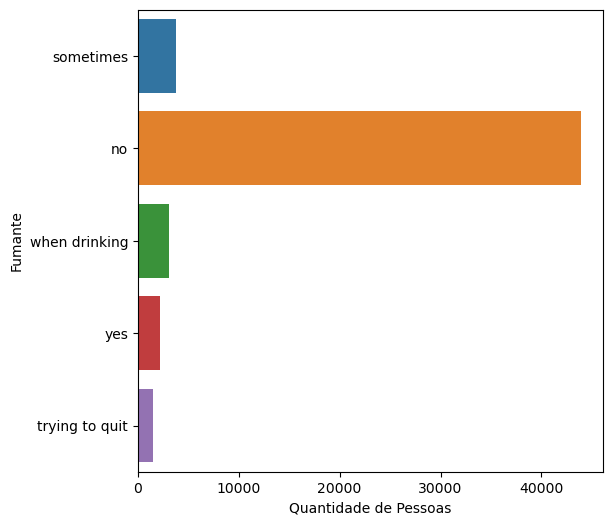

In [27]:
sns.countplot(data=df, y = 'smokes')
plt.ylabel('Fumante')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Religião vs Orientação Sexual

Agora, respondendo à uma das perguntas do meu projeto, irei concluir que a grande parte da população de cada religião é composta por heterossexuais e, nas religiões hindu e islâmica todos os praticantes são heterossexuais.

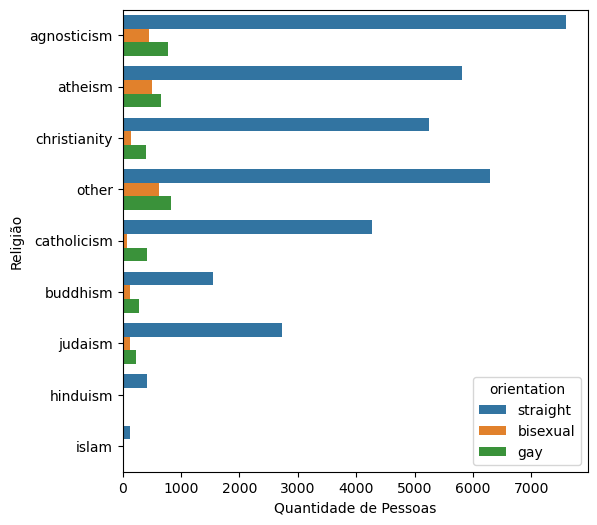

In [28]:
sns.countplot(data=df, y = 'religionCleaned', hue = 'orientation')
plt.ylabel('Religião')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Status de Relacionamento

Aqui os dados foram bem previsíveis, já que são dados de um app de namoro. A maioria dos usuários são solteiros, porém, é possível perceber que até pessoas casadas se cadastraram no aplicativo.

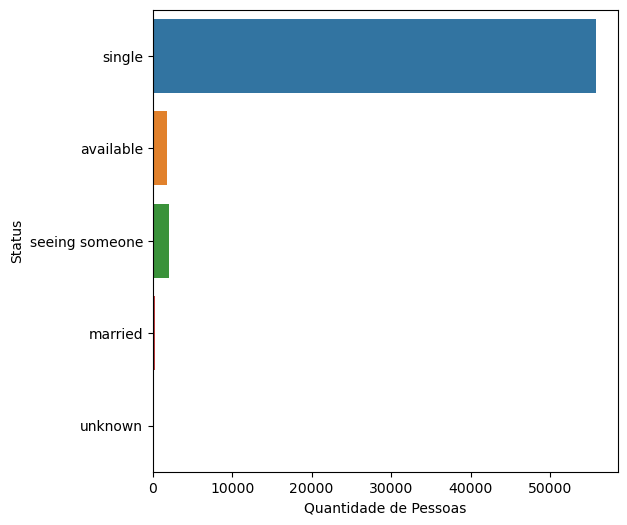

In [29]:
sns.countplot(data = df, y = 'status')
plt.ylabel('Status')
plt.xlabel('Quantidade de Pessoas')
plt.show()
plt.clf()

## Preparação dos Dados

## Dados Ausentes

Dados ausentes não são bons quando aplicado à algoritmos de machine learning, logo, teremos que fazer essa checagem para poder preencher ou remover esses dados.

In [30]:
df.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Pré-processamento

Preparar os dados para modelagem é importante, pois pode acelerar o processo e produzir modelos melhores. Então queremos ter certeza de que os dados que estamos inserindo em nossa etapa de modelagem são bons o suficiente para compartilhar com outras pessoas.

Os dados para o modelo serão um subconjunto das variáveis. As variáveis foram selecionadas porque podem ser um bom preditor para signos astrológicos, enquanto algumas das variáveis que não foram selecionadas, como 'age', provavelmente não são um bom indicador.

Aqui os valores NA são descartados para criar um conjunto de dados totalmente completo.

In [31]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = df[cols].dropna()
df.shape

(16453, 8)

#### Variáveis Dummy

Nesta próxima etapa, variáveis fictícias são criadas para lidar com as variáveis categóricas. As variáveis fictícias transformarão as categorias por variável em seu próprio identificador binário. Os dados agora têm 81 colunas para prever sinais.

In [32]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [33]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Desequilíbrio do rótulo

Um desequilíbrio no rótulo de previsão precisa ser verificado. Isso é importante, pois é um problema multiclasse em que dois ou mais resultados podem ser obtidos. Um desequilíbrio em uma variável de resposta é ruim, pois significa que alguns rótulos ocorrem apenas algumas vezes. Isso é um problema para algoritmos de aprendizado de máquina se não houver dados suficientes para treinar com os quais fornecerão previsões ruins.

No conjunto de dados fornecido, observamos que as contagens de todos os signos do zodíaco são mais ou menos iguais (ou seja, sem grandes desvios). Portanto, não precisamos nos preocupar com desequilíbrios e tentar resolver esse problema.

In [34]:
df.signsCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

#### Divisão de dados

Em seguida, os dados precisam ser divididos em conjuntos de treinamento e validação. Nesta divisão 25% dos dados são reservados para a validação final, enquanto 75% são mantidos para o treinamento do modelo.

In [35]:
col_length = len(df.columns)

#Y é a coluna de destino e X é o resto
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Tamanho do bloco de validação
val_size = 0.25

#Divisão dos dados em blocos
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#transformar em matrizes de uma dimensão
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Previsão

#### construção do modelo

Agora é hora de criar alguns modelos, aqui está uma lista de [modelos de várias classes](https://scikit-learn.org/stable/modules/multiclass.html) disponíveis no scikit learn. Para este projeto, três algoritmos comuns serão usados para fazer previsões.

Abaixo, são carregados os respectivos módulos de Regressão Logística, Árvores de Decisão e KNN.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Regressão Logística

O primeiro modelo será usando regressão logística com o argumento `multi_class="multinomial"`.

In [37]:
lr_model = LogisticRegression(multi_class="multinomial", max_iter = 500).fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.16      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.12      0.09      0.10       997
 sagittarius       0.13      0.10      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.13      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



A precisão final do modelo de regressão logística é de 12%, o que é terrível, considerando que uma estimativa aleatória deve resultar em aproximadamente 8% das vezes (1/12).

#### K Nearest Neighbor

O próximo modelo é o KNeighborsClassifier que levará 20 de seus vizinhos para prever os sinais. O valor padrão para n_vizinhos é 5 que foi mantido. Este número pode ser ajustado posteriormente, se necessário. Este modelo teve uma precisão de 33%, o que é um bom sinal.

In [39]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [40]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### Decision Tree

O último modelo é a árvore de decisão, o padrão `max_depth` é `none`, o que significa que será "Se None, então os nós serão expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split.". Os resultados são muito promissores porque tem uma precisão de 78% com este modelo.

In [41]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [42]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Abaixo está uma matriz de confusão dos resultados com os valores verdadeiros no eixo y e os valores previstos ao longo do eixo x. Como as diagonais são de cor mais clara e têm números mais altos, a precisão será alta, pois esses são os verdadeiros positivos.

In [43]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

<Figure size 600x600 with 0 Axes>

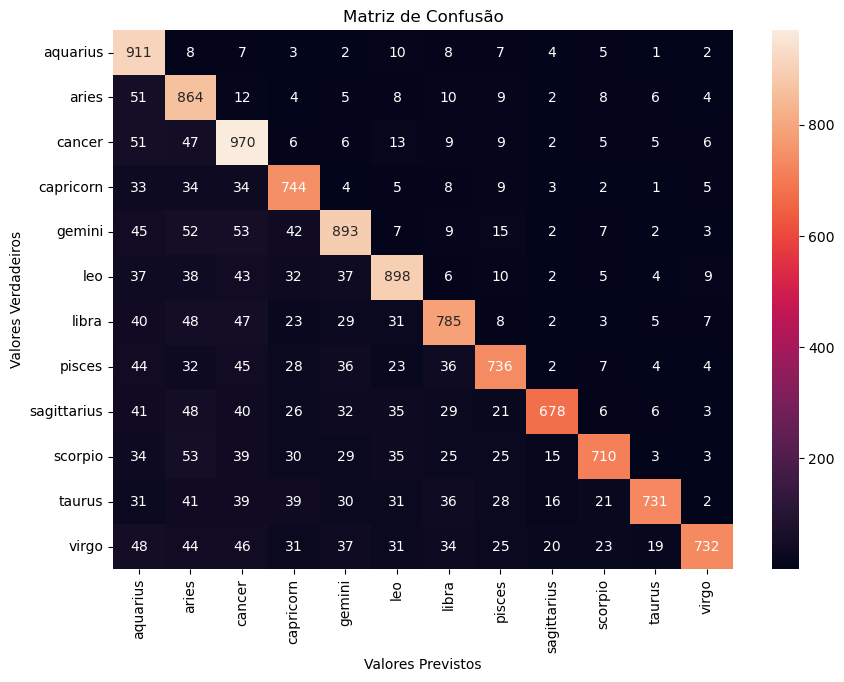

In [44]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d")

ax.set_xlabel('Valores Previstos')
ax.set_ylabel('Valores Verdadeiros')
ax.set_title('Matriz de Confusão')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels) 
ax.yaxis.set_ticklabels(cart_labels)

plt.show()
plt.clf()

Voltando ao modelo, uma análise rápida mostrará que esse modelo de árvore tem uma profundidade de 49 ramificações, o que provavelmente não generalizará para outro conjunto de dados. Nesse caso, esse modelo teve um 'overfit' para esses dados.

In [45]:
cart_model.get_depth()

49

Para deixar claro, uma validação cruzada de cinco vezes é criada com os mesmos dados. Os resultados são piores do que o KNN e sobre os algoritmos de regressão logística. a linha de base foi de ~9%

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08589951 0.09278768 0.08995138 0.09400324 0.08471828]
Baseline: 8.95% (0.37%)


O modelo da árvore de decisão será feito novamente, mas com um `max_depth` de 20 para impedir que o algoritmo atinja o ponto de parada. A nova taxa de precisão de ~41% é pior do que a primeira iteração, mas um pouco melhor do que o modelo KNN.

In [47]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [48]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.28      0.42      0.34      1028
      pisces       0.66      0.33      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.35      0.40      0.37      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.46      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



Se verificarmos novamente com a validação cruzada, o novo modelo ainda terá uma média de ~8%, o que não é muito bom.

#### Modelo final

Portanto, parece que o `knn_model` pode ser o melhor modelo para o OkCupid usar quando os usuários não têm seus signos listados em seu perfil de usuário. Ao usar o conjunto de espera ou validação, obtemos ~ 8% de precisão, o que não é muito bom.

In [49]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



Na matriz de confusão, fica claro que Câncer, Gêmeos, Leão e Virgem foram previstos com mais frequência, mas não foram super precisos, pois a faixa de cores vertical representa até mesmo palpites distribuídos, principalmente errados e alguns corretos.

<Figure size 600x600 with 0 Axes>

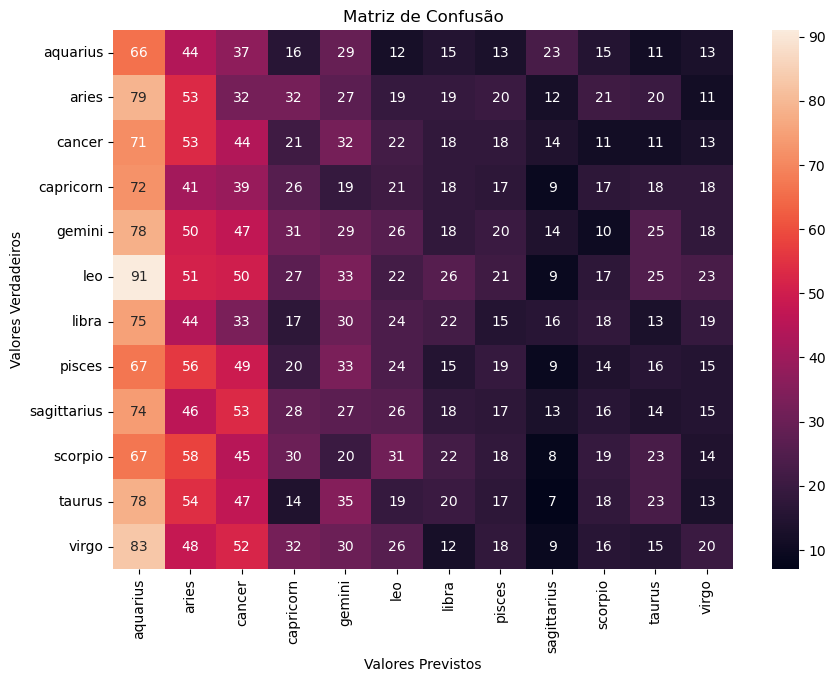

In [50]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d")

ax.set_xlabel('Valores Previstos')
ax.set_ylabel('Valores Verdadeiros')
ax.set_title('Matriz de Confusão')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels)
ax.yaxis.set_ticklabels(knn_labels)

plt.show()
plt.clf()

### Conclusão

#### Comentários gerais

Neste projeto, o aprendizado de máquina foi usado para prever os signos astrológicos dos usuários do OkCupid. Esta é uma característica importante, pois muitas pessoas acreditam em astrologia e correspondências entre signos estelares compatíveis. Se os usuários não inserirem seus sinais, uma solução algorítmica pode gerar um sinal para imputar dados ausentes ao fazer correspondências.

Infelizmente, o algoritmo final selecionado não foi melhor do que adivinhação básica.